In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

baseline_path = Path("../reports/metrics_pair_noq/metrics_summary.tsv")
tuned_path    = Path("../reports/hparam_tuning_pair_noq/tuned_models_summary.tsv")

baseline = pd.read_csv(baseline_path, sep="\t")
tuned    = pd.read_csv(tuned_path,    sep="\t")

# 1) Clean up old model_base if it exists
for df in (baseline, tuned):
    if "model_base" in df.columns:
        del df["model_base"]

# 2) Create normalized model key
tuned["model_base"]    = tuned["model"].str.replace("_tuned$", "", regex=True)
baseline["model_base"] = baseline["model"]

# 3) Drop original 'model' columns to avoid suffix conflict
for df in (baseline, tuned):
    if "model" in df.columns:
        del df["model"]

# 4) Merge on model_base
merged = baseline.merge(
    tuned,
    on="model_base",
    suffixes=("_base", "_tuned"),
)

# 5) Nice display name
merged["model_name"] = merged["model_base"]

# 6) Sort by tuned F1
merged = merged.sort_values("test_f1_tuned", ascending=False).reset_index(drop=True)

merged[[
    "model_name",
    "test_f1_base", "test_roc_auc_base",
    "test_f1_tuned", "test_roc_auc_tuned"
]]

,model_name,test_f1_base,test_roc_auc_base,test_f1_tuned,test_roc_auc_tuned
0,gradient_boosting,0.774213,0.844844,0.776460,0.845858
1,catboost,0.775114,0.843362,0.775289,0.842918
2,lightgbm,0.772146,0.841671,0.773802,0.843451
3,bagging_trees,0.769742,0.837357,0.772422,0.841870
4,random_forest,0.769097,0.832766,0.772376,0.838799
5,xgboost,0.772747,0.841042,0.770118,0.843225
6,extra_trees,0.763950,0.826517,0.769878,0.834912
7,mlp,0.749660,0.829611,0.749167,0.828506
8,logreg_l2,0.746860,0.829807,0.745187,0.825632
9,linear_svm_calibrated,0.747426,0.829602,0.744848,0.825147


BEFORE AND AFTER HYPERTUNING

/var/folders/sj/r5b1vnb91cjffx5_zt6rs8v80000gn/T/ipykernel_72358/2969250602.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(plot_df["model_name"], rotation=45, ha="right")


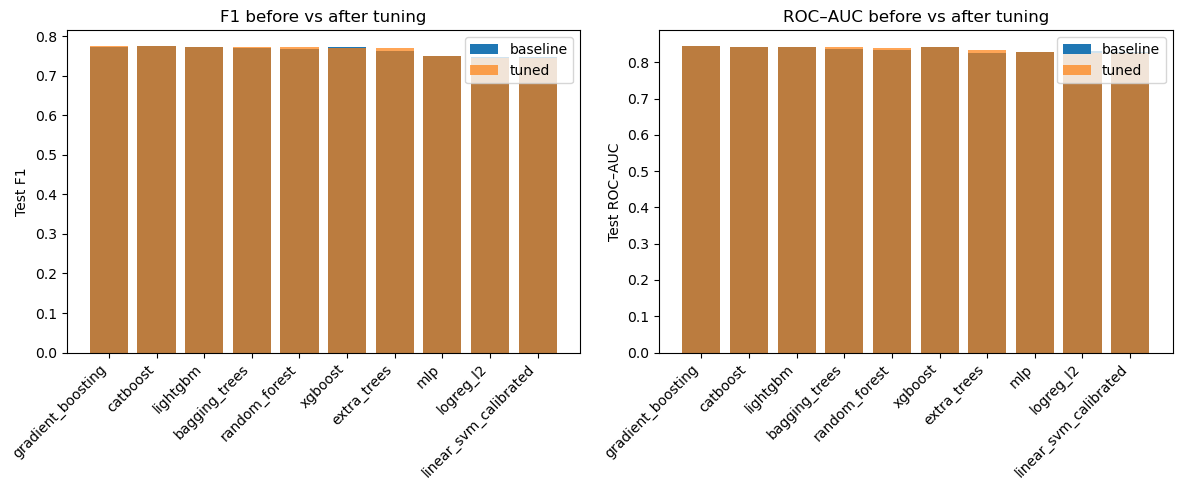

In [84]:
import matplotlib.pyplot as plt

# Use the merged you already computed
plot_df = merged.copy()

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# 1) F1
axes[0].set_xticks(range(len(plot_df["model_name"])))
axes[0].set_xticklabels(plot_df["model_name"], rotation=45, ha="right")


axes[0].bar(plot_df["model_name"], plot_df["test_f1_base"], label="baseline")
axes[0].bar(plot_df["model_name"], plot_df["test_f1_tuned"],
            alpha=0.7, label="tuned")
axes[0].set_xticklabels(plot_df["model_name"], rotation=45, ha="right")
axes[0].set_ylabel("Test F1")
axes[0].set_title("F1 before vs after tuning")
axes[0].legend()

# 2) ROC–AUC
axes[1].bar(plot_df["model_name"], plot_df["test_roc_auc_base"], label="baseline")
axes[1].bar(plot_df["model_name"], plot_df["test_roc_auc_tuned"],
            alpha=0.7, label="tuned")
axes[1].set_xticklabels(plot_df["model_name"], rotation=45, ha="right")
axes[1].set_ylabel("Test ROC–AUC")
axes[1].set_title("ROC–AUC before vs after tuning")
axes[1].legend()

plt.tight_layout()
plt.show()

In [85]:
import json
import pandas as pd
from pathlib import Path

TEST_PATH = "../data/processed/PAIR_test_noq.tsv"
OUT_PATH  = Path("../models_pair_noq_tuned/feature_cols.json")

df = pd.read_csv(TEST_PATH, sep="\t")

numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
feature_cols = [c for c in numeric_cols if c != "label"]

OUT_PATH.parent.mkdir(parents=True, exist_ok=True)
json.dump(feature_cols, open(OUT_PATH, "w"), indent=2)

print("Saved:", OUT_PATH)
print("n_features:", len(feature_cols))
print("first 10:", feature_cols[:10])

Saved: ../models_pair_noq_tuned/feature_cols.json
n_features: 23
first 10: ['read_length', 'mapq', 'has_sa', 'sa_count', 'num_segments', 'sa_diff_contig', 'sa_min_delta_pos', 'sa_max_delta_pos', 'sa_mean_delta_pos', 'sa_same_strand_count']


CONFUSION MATRIX + CLASSIFICATION REPORT

X_test shape: (7997, 24) n_feat: 24

=== catboost ===
              precision    recall  f1-score   support

       clean     0.7383    0.9542    0.8325      3997
    chimeric     0.9354    0.6620    0.7753      4000

    accuracy                         0.8081      7997
   macro avg     0.8368    0.8081    0.8039      7997
weighted avg     0.8369    0.8081    0.8039      7997



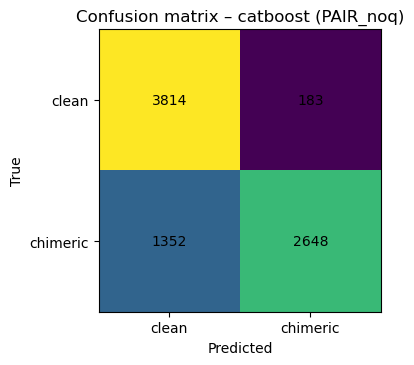


=== gradient_boosting ===
              precision    recall  f1-score   support

       clean     0.7391    0.9552    0.8334      3997
    chimeric     0.9368    0.6630    0.7765      4000

    accuracy                         0.8091      7997
   macro avg     0.8379    0.8091    0.8049      7997
weighted avg     0.8380    0.8091    0.8049      7997



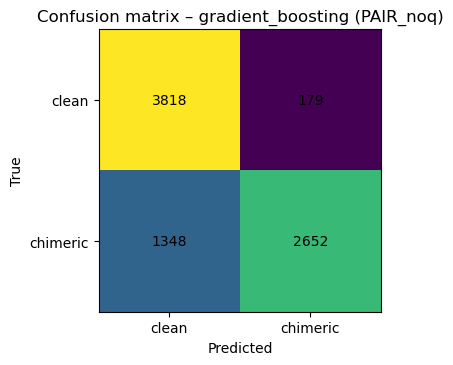


=== bagging_trees ===
              precision    recall  f1-score   support

       clean     0.7368    0.9495    0.8297      3997
    chimeric     0.9290    0.6610    0.7724      4000

    accuracy                         0.8052      7997
   macro avg     0.8329    0.8052    0.8011      7997
weighted avg     0.8329    0.8052    0.8010      7997



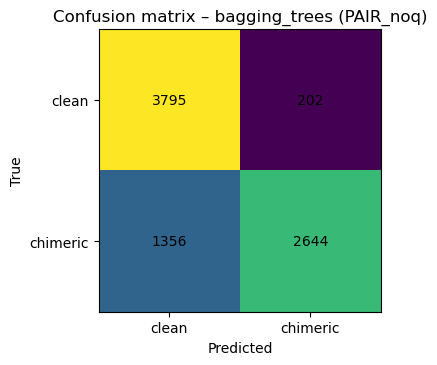


=== mlp ===
              precision    recall  f1-score   support

       clean     0.7170    0.9677    0.8237      3997
    chimeric     0.9504    0.6182    0.7492      4000

    accuracy                         0.7929      7997
   macro avg     0.8337    0.7930    0.7864      7997
weighted avg     0.8337    0.7929    0.7864      7997



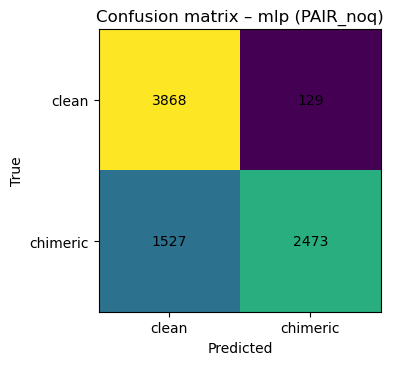

In [86]:
import pandas as pd
import numpy as np
from joblib import load
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ----------------------------
# 1) Build X_test / y_test the SAME way as training
# ----------------------------
def make_X_y_like_training(tsv_path: str):
    df = pd.read_csv(tsv_path, sep="\t")

    # IMPORTANT: convert strand to numeric BEFORE selecting numeric columns
    if "strand" in df.columns:
        df["strand"] = df["strand"].map({"+": 1, "-": 0}).astype(float)

    num_cols = df.select_dtypes(include="number").columns.tolist()
    feat_cols = [c for c in num_cols if c != "label"]

    X = df[feat_cols].to_numpy(dtype=float)
    y = df["label"].to_numpy(dtype=int)

    return X, y, feat_cols

X_test, y_test, feat_cols = make_X_y_like_training("../data/processed/PAIR_test_noq.tsv")
print("X_test shape:", X_test.shape, "n_feat:", len(feat_cols))

# ----------------------------
# 2) Load models (example)
# ----------------------------
models = {
    "catboost": load("../models_PAIR_noq_tuned/catboost_tuned.joblib"),
    "gradient_boosting": load("../models_PAIR_noq_tuned/gradient_boosting_tuned.joblib"),
    "bagging_trees": load("../models_PAIR_noq_tuned/bagging_trees_tuned.joblib"),
    "mlp": load("../models_PAIR_noq_tuned/mlp_tuned.joblib"),
}

# ----------------------------
# 3) Evaluate + plot confusion matrices (matplotlib only)
# ----------------------------
def plot_cm(cm, title):
    plt.figure(figsize=(4, 4))
    plt.imshow(cm)
    plt.title(title)
    plt.xticks([0, 1], ["clean", "chimeric"])
    plt.yticks([0, 1], ["clean", "chimeric"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    for (i, j), v in np.ndenumerate(cm):
        plt.text(j, i, str(v), ha="center", va="center")
    plt.tight_layout()
    plt.show()

for name, model in models.items():
    print(f"\n=== {name} ===")

    y_pred = model.predict(X_test)

    # some models return shape (N,1) or floats -> normalize
    y_pred = np.array(y_pred).reshape(-1).astype(int)

    print(classification_report(
        y_test, y_pred,
        target_names=["clean", "chimeric"],
        digits=4,
        zero_division=0
    ))

    cm = confusion_matrix(y_test, y_pred)
    plot_cm(cm, f"Confusion matrix – {name} (PAIR_noq)")

In [87]:
import pandas as pd
import numpy as np
from joblib import load
from sklearn.metrics import f1_score

def make_X_y_like_training(tsv_path: str):
    df = pd.read_csv(tsv_path, sep="\t")

    # IMPORTANT: force strand numeric BEFORE numeric-col selection
    if "strand" in df.columns:
        df["strand"] = df["strand"].map({"+": 1, "-": 0}).astype(float)

    # numeric features exactly like training rule
    num_cols = df.select_dtypes(include="number").columns.tolist()
    feat_cols = [c for c in num_cols if c != "label"]

    X = df[feat_cols].to_numpy(dtype=float)
    y = df["label"].to_numpy(dtype=int)

    return X, y, feat_cols

# Build X_test using the corrected rule
X_test, y_test, feat_cols = make_X_y_like_training("../data/processed/PAIR_test_noq.tsv")
print("X_test shape:", X_test.shape, "n_feat:", len(feat_cols))
print("last5:", feat_cols[-5:])

m = load("../models_PAIR_noq_tuned/catboost_tuned.joblib")
proba = m.predict_proba(X_test)[:, 1]   # should now match model schema

best_t, best_f1 = 0.5, 0.0
for t in [i/100 for i in range(1, 100)]:
    pred = (proba >= t).astype(int)
    f1 = f1_score(y_test, pred, zero_division=0)
    if f1 > best_f1:
        best_f1, best_t = f1, t

print("best_t:", best_t, "best_f1:", best_f1)

X_test shape: (7997, 24) n_feat: 24
last5: ['breakpoint_read_pos', 'kmer_cosine_diff', 'kmer_js_divergence', 'microhomology_length', 'microhomology_gc']
best_t: 0.46 best_f1: 0.7785195936139332


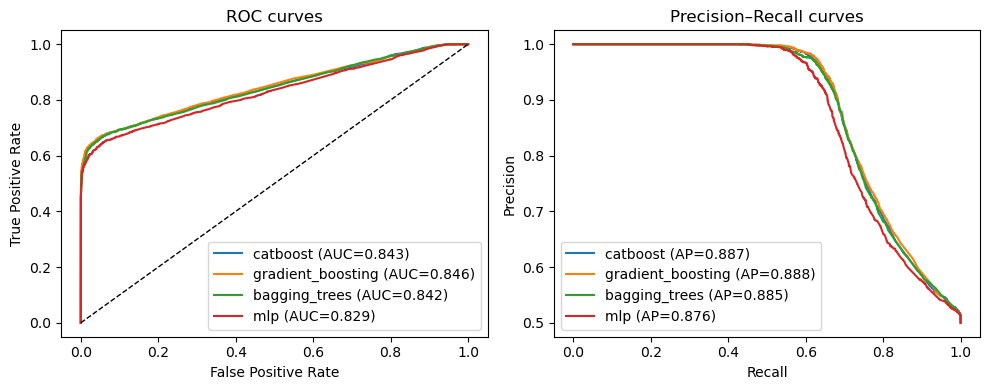

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

plt.figure(figsize=(10,4))

# ROC
plt.subplot(1,2,1)
for name, model in models.items():
    # scores: probas if available, else decision_function
    if hasattr(model, "predict_proba"):
        scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_test)
    else:
        continue

    fpr, tpr, _ = roc_curve(y_test, scores)
    auc = roc_auc_score(y_test, scores)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves")
plt.legend()

# PR
plt.subplot(1,2,2)
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_test)
    else:
        continue

    prec, rec, _ = precision_recall_curve(y_test, scores)
    ap = average_precision_score(y_test, scores)
    plt.plot(rec, prec, label=f"{name} (AP={ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall curves")
plt.legend()

plt.tight_layout()
plt.show()

X_test: (7997, 24) n_feat: 24
last5: ['breakpoint_read_pos', 'kmer_cosine_diff', 'kmer_js_divergence', 'microhomology_length', 'microhomology_gc']

=== Permutation importance (catboost) ===


,feature,importance_mean,importance_std
0,total_clipped_bases,0.062111,0.004133
1,kmer_js_divergence,0.045464,0.003056
2,softclip_left,0.032949,0.002186
3,softclip_right,0.032348,0.003370
4,kmer_cosine_diff,0.028761,0.002122
5,mapq,0.004543,0.000936
6,sa_mean_mapq,0.002112,0.000726
7,has_sa,0.001332,0.000716
8,microhomology_gc,0.001086,0.000497
9,sa_max_delta_pos,0.001020,0.000792



=== Permutation importance (gradient_boosting) ===


,feature,importance_mean,importance_std
0,total_clipped_bases,0.116642,0.003657
1,kmer_js_divergence,0.058106,0.003268
2,kmer_cosine_diff,0.038158,0.002506
3,softclip_left,0.011062,0.001767
4,softclip_right,0.006126,0.001456
5,mapq,0.004542,0.000996
6,microhomology_gc,0.000549,0.000599
7,sa_opp_strand_count,0.000000,0.000000
8,breakpoint_read_pos,0.000000,0.000000
9,sa_mean_nm,0.000000,0.000000



=== Permutation importance (bagging_trees) ===


,feature,importance_mean,importance_std
0,total_clipped_bases,0.273915,0.004894
1,kmer_js_divergence,0.026137,0.003510
2,kmer_cosine_diff,0.010739,0.002009
3,mapq,0.003299,0.000666
4,softclip_right,0.002928,0.001239
5,microhomology_length,0.000210,0.000762
6,read_length,0.000000,0.000000
7,sa_min_nm,0.000000,0.000000
8,sa_diff_contig,0.000000,0.000000
9,breakpoint_read_pos,0.000000,0.000000



=== Permutation importance (mlp) ===


,feature,importance_mean,importance_std
0,total_clipped_bases,0.054920,0.004040
1,softclip_right,0.026253,0.003806
2,sa_min_delta_pos,0.025902,0.002782
3,sa_max_delta_pos,0.025902,0.002782
4,sa_mean_delta_pos,0.025902,0.002782
5,softclip_left,0.022333,0.001451
6,mapq,0.001505,0.000598
7,microhomology_gc,0.000045,0.000056
8,microhomology_length,0.000045,0.000056
9,num_segments,0.000045,0.000056


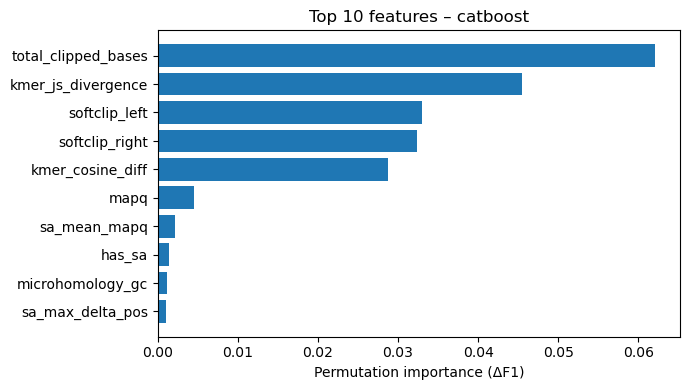

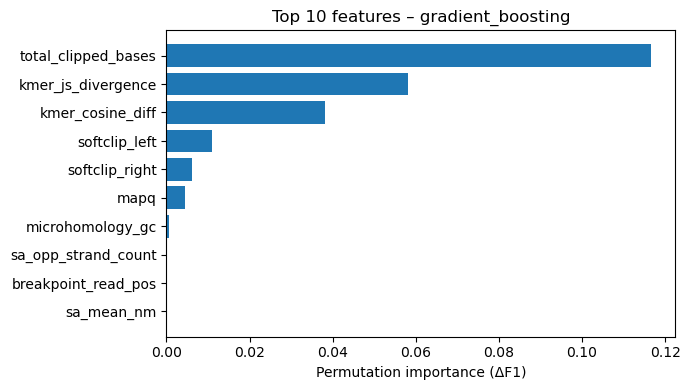

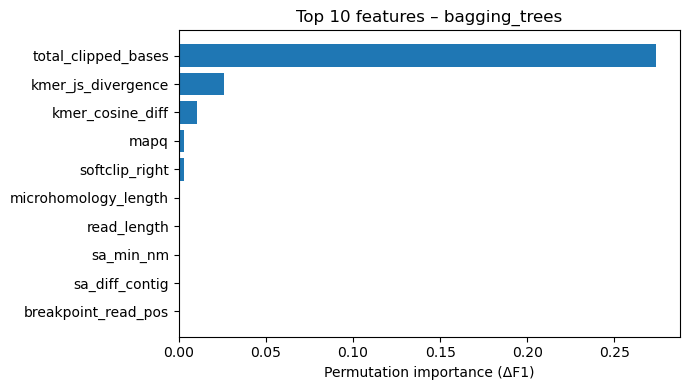

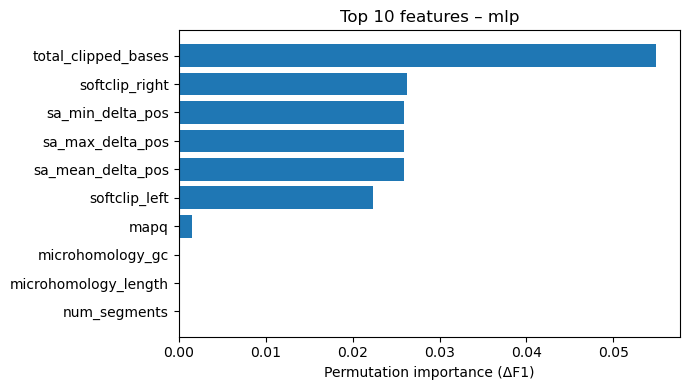

In [89]:
import pandas as pd
import numpy as np
from joblib import load
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# -----------------------------
# 1) Load model(s)
# -----------------------------
models = {
    "catboost": load("../models_PAIR_noq_tuned/catboost_tuned.joblib"),
    "gradient_boosting": load("../models_PAIR_noq_tuned/gradient_boosting_tuned.joblib"),
    "bagging_trees": load("../models_PAIR_noq_tuned/bagging_trees_tuned.joblib"),
    "mlp": load("../models_PAIR_noq_tuned/mlp_tuned.joblib"),
}

# -----------------------------
# 2) Build X_test EXACTLY like training
#    (critical: strand -> numeric BEFORE selecting numeric cols)
# -----------------------------
def make_X_y_and_names(tsv_path: str):
    df = pd.read_csv(tsv_path, sep="\t")

    if "strand" in df.columns:
        df["strand"] = df["strand"].map({"+": 1.0, "-": 0.0}).astype(float)

    num_cols = df.select_dtypes(include="number").columns.tolist()
    feat_cols = [c for c in num_cols if c != "label"]

    X = df[feat_cols].to_numpy(dtype=float)
    y = df["label"].to_numpy(dtype=int)

    return X, y, feat_cols

X_test, y_test, feature_names = make_X_y_and_names("../data/processed/PAIR_test_noq.tsv")
print("X_test:", X_test.shape, "n_feat:", len(feature_names))
print("last5:", feature_names[-5:])

# -----------------------------
# 3) Permutation importance
# -----------------------------
def perm_importance(model, X, y, feature_names, scoring="f1", n_repeats=10):
    r = permutation_importance(
        model, X, y,
        n_repeats=n_repeats,
        random_state=42,
        n_jobs=-1,
        scoring=scoring,
    )
    df_imp = pd.DataFrame({
        "feature": feature_names,
        "importance_mean": r.importances_mean,
        "importance_std": r.importances_std,
    }).sort_values("importance_mean", ascending=False).reset_index(drop=True)
    return df_imp

imp_results = {}
for name, model in models.items():
    print(f"\n=== Permutation importance ({name}) ===")
    df_imp = perm_importance(model, X_test, y_test, feature_names, scoring="f1", n_repeats=10)
    imp_results[name] = df_imp
    display(df_imp.head(10))

# -----------------------------
# 4) Plot top 10
# -----------------------------
def plot_top10(df_imp, title):
    top = df_imp.head(10).iloc[::-1]  # reverse for barh
    plt.figure(figsize=(7, 4))
    plt.barh(top["feature"], top["importance_mean"])
    plt.xlabel("Permutation importance (ΔF1)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

for name in ["catboost", "gradient_boosting", "bagging_trees", "mlp"]:
    plot_top10(imp_results[name], f"Top 10 features – {name}")

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Define which feature belongs to which family ---

family_map = {
    "SA_structure": [
        "has_sa",
        "sa_count",
        "num_segments",
        "sa_diff_contig",
        "sa_min_delta_pos",
        "sa_max_delta_pos",
        "sa_mean_delta_pos",
        "sa_same_strand_count",
        "sa_opp_strand_count",
        "sa_max_mapq",
        "sa_mean_mapq",
        "sa_min_nm",
        "sa_mean_nm",
    ],
    "Clipping": [
        "softclip_left",
        "softclip_right",
        "total_clipped_bases",
        "breakpoint_read_pos",
    ],
    "Kmer_jump": [
        "kmer_cosine_diff",
        "kmer_js_divergence",
    ],
    "Micro_homology": [
        "microhomology_length",
        "microhomology_gc",
    ],
    # optional: alignment quality / misc features
    "Other": [
        "mapq",      # alignment quality
        # add any remaining numeric features that don't fit above
        # e.g. "ref_start_1based" if it is still in your noq feature set
    ],
}

In [92]:
def aggregate_family_importance(df_imp: pd.DataFrame, family_map: dict) -> pd.DataFrame:
    """
    df_imp: DataFrame with columns ["feature", "importance_mean", "importance_std"]
    returns: DataFrame with one row per family, summing importance_mean of its features.
    """
    rows = []
    for fam, feats in family_map.items():
        sub = df_imp[df_imp["feature"].isin(feats)]
        if sub.empty:
            continue
        rows.append({
            "family": fam,
            "importance_sum": sub["importance_mean"].sum(),
            "importance_mean": sub["importance_mean"].mean(),
            "n_features": len(sub),
        })
    fam_df = pd.DataFrame(rows).sort_values("importance_sum", ascending=False)
    return fam_df

In [93]:
family_results = {}

for model_name, df_imp in imp_results.items():
    fam_df = aggregate_family_importance(df_imp, family_map)
    family_results[model_name] = fam_df
    print(f"\n=== Aggregated feature families – {model_name} ===")
    display(fam_df)


=== Aggregated feature families – catboost ===


,family,importance_sum,importance_mean,n_features
1,Clipping,0.127407,0.031852,4
2,Kmer_jump,0.074225,0.037113,2
4,Other,0.004543,0.004543,1
0,SA_structure,0.003253,0.000250,13
3,Micro_homology,0.001298,0.000649,2



=== Aggregated feature families – gradient_boosting ===


,family,importance_sum,importance_mean,n_features
1,Clipping,0.133830,0.033458,4
2,Kmer_jump,0.096264,0.048132,2
4,Other,0.004542,0.004542,1
3,Micro_homology,0.000347,0.000174,2
0,SA_structure,-0.000859,-0.000066,13



=== Aggregated feature families – bagging_trees ===


,family,importance_sum,importance_mean,n_features
1,Clipping,0.276685,0.069171,4
2,Kmer_jump,0.036877,0.018438,2
4,Other,0.003299,0.003299,1
3,Micro_homology,0.000118,0.000059,2
0,SA_structure,-0.001632,-0.000126,13



=== Aggregated feature families – mlp ===


,family,importance_sum,importance_mean,n_features
1,Clipping,0.103506,0.025876,4
0,SA_structure,0.077751,0.005981,13
4,Other,0.001505,0.001505,1
3,Micro_homology,0.000091,0.000045,2
2,Kmer_jump,0.000034,0.000017,2


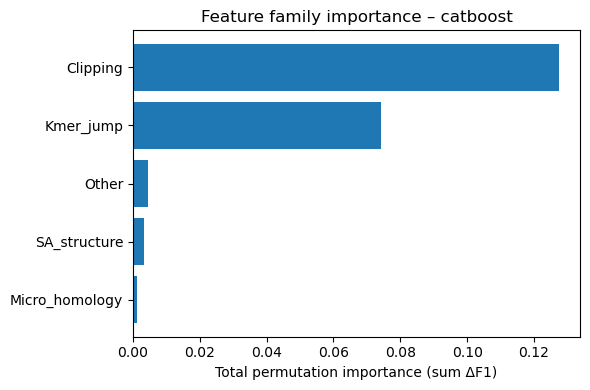

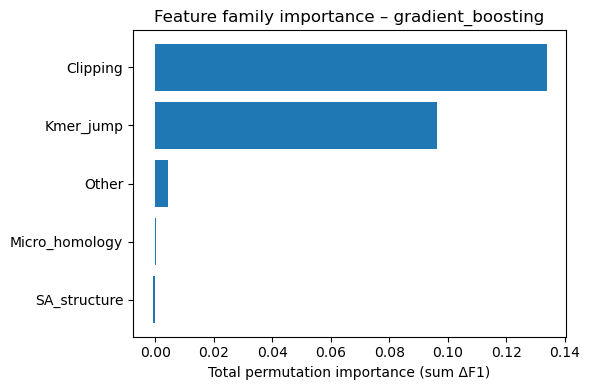

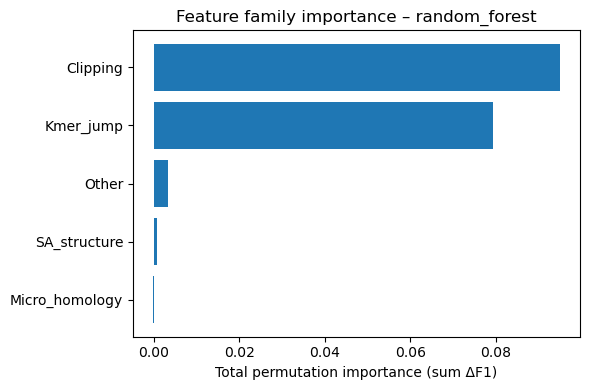

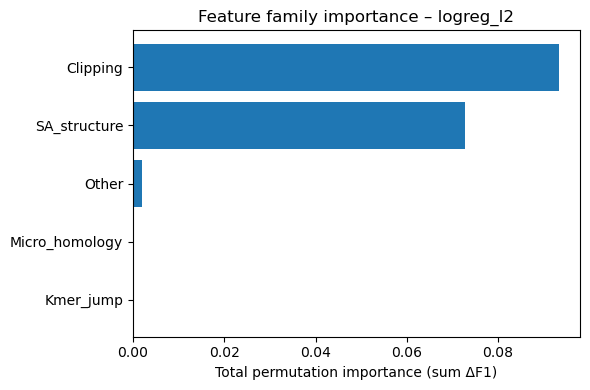

In [65]:
for model_name, fam_df in family_results.items():
    # sort so the smallest bar is at bottom
    fam_sorted = fam_df.sort_values("importance_sum", ascending=True)

    plt.figure(figsize=(6, 4))
    plt.barh(fam_sorted["family"], fam_sorted["importance_sum"])
    plt.xlabel("Total permutation importance (sum ΔF1)")
    plt.title(f"Feature family importance – {model_name}")
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score, roc_auc_score

# ---- helper: load dataset from TSV (same logic as hyperparam_search_top) ----
def load_dataset(path: str):
    df = pd.read_csv(path, sep="\t")

    if "label" not in df.columns:
        raise ValueError("Expected a 'label' column in the dataset.")

    numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
    feature_cols = [c for c in numeric_cols if c != "label"]

    X = df[feature_cols].to_numpy(dtype=float)
    y = df["label"].to_numpy(dtype=int)
    return X, y, feature_cols

# ---- paths: adjust if yours are different ----
train_path = "../data/processed/PAIR_train_noq.tsv"
test_path  = "../data/processed/PAIR_test_noq.tsv"
model_path = "../models_pair_noq_tuned/gradient_boosting_tuned.joblib"  # or models_pair_noq/catboost.joblib if that's what you have

# ---- load data ----
X_train, y_train, feature_names = load_dataset(train_path)
X_test, y_test, _ = load_dataset(test_path)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Num features:", len(feature_names))

# ---- load tuned gradient boosting model ----
gb_model = joblib.load(model_path)
type(gb_model), gb_model.get_params()

Train shape: (31986, 23)
Test shape: (7997, 23)
Num features: 23


(sklearn.ensemble._gb.GradientBoostingClassifier,
 {'ccp_alpha': 0.0,
  'criterion': 'friedman_mse',
  'init': None,
  'learning_rate': 0.2,
  'loss': 'log_loss',
  'max_depth': 3,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 400,
  'n_iter_no_change': None,
  'random_state': 42,
  'subsample': 1.0,
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': 0,
  'warm_start': False})

In [98]:
import pandas as pd
import numpy as np

def make_X_y_like_training(tsv_path: str):
    df = pd.read_csv(tsv_path, sep="\t")

    # force strand numeric (this is the missing feature!)
    if "strand" in df.columns:
        df["strand"] = df["strand"].map({"+": 1, "-": 0}).astype(float)

    num_cols = df.select_dtypes(include="number").columns.tolist()
    feat_cols = [c for c in num_cols if c != "label"]

    X = df[feat_cols].to_numpy(dtype=float)
    y = df["label"].to_numpy(dtype=int)
    return X, y, feat_cols

X_test, y_test, feature_names = make_X_y_like_training("../data/processed/PAIR_test_noq.tsv")
print("X_test n_features:", X_test.shape[1])
print("last5:", feature_names[-5:])

X_test n_features: 24
last5: ['breakpoint_read_pos', 'kmer_cosine_diff', 'kmer_js_divergence', 'microhomology_length', 'microhomology_gc']


In [103]:
import pandas as pd
import numpy as np
import joblib
from pathlib import Path
from sklearn.inspection import permutation_importance

# ------------------------------------------------------------
# Canonical loader: MUST match your training rule
# (map strand -> numeric BEFORE selecting numeric feature cols)
# ------------------------------------------------------------
def load_dataset_like_training(path: str):
    df = pd.read_csv(path, sep="\t")

    if "label" not in df.columns:
        raise ValueError("Expected a 'label' column in the dataset.")

    # IMPORTANT: make strand numeric so it's included as a numeric feature
    if "strand" in df.columns:
        df["strand"] = df["strand"].map({"+": 1.0, "-": 0.0}).astype(float)

    # numeric-only feature rule (same as your scripts)
    numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
    feature_cols = [c for c in numeric_cols if c != "label"]

    X = df[feature_cols].to_numpy(dtype=float)
    y = df["label"].to_numpy(dtype=int)

    return X, y, feature_cols


# ------------------------------------------------------------
# Paths (PAIR)
# ------------------------------------------------------------
train_path = "../data/processed/PAIR_train_noq.tsv"
test_path  = "../data/processed/PAIR_test_noq.tsv"
model_path = "../models_PAIR_noq_tuned/gradient_boosting_tuned.joblib"

out_dir = Path("../reports/gradient_boosting_analysis_PAIR_noq")
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / "gradient_boosting_perm_importance.tsv"


# ------------------------------------------------------------
# Load data + model
# ------------------------------------------------------------
X_train, y_train, feature_names = load_dataset_like_training(train_path)
X_test,  y_test,  feature_names_test = load_dataset_like_training(test_path)

# Sanity: feature schema must match between train and test
if feature_names_test != feature_names:
    # enforce identical order using training feature list
    # (add any missing cols as 0, drop extras)
    df_test = pd.read_csv(test_path, sep="\t")
    if "strand" in df_test.columns:
        df_test["strand"] = df_test["strand"].map({"+": 1.0, "-": 0.0}).astype(float)

    # build a DF of numeric features, then align
    numeric_cols = df_test.select_dtypes(include=["number"]).columns.tolist()
    feat_cols_raw = [c for c in numeric_cols if c != "label"]
    Xdf = df_test[feat_cols_raw].copy()

    for c in feature_names:
        if c not in Xdf.columns:
            Xdf[c] = 0.0
    Xdf = Xdf[feature_names]

    X_test = Xdf.to_numpy(dtype=float)
    y_test = df_test["label"].to_numpy(dtype=int)

print("Train:", X_train.shape, " Test:", X_test.shape, " n_feat:", len(feature_names))

gb_model = joblib.load(model_path)
print("Loaded model:", type(gb_model))


# ------------------------------------------------------------
# Permutation importance (F1 scorer uses predict(), not predict_proba)
# ------------------------------------------------------------
result = permutation_importance(
    gb_model,
    X_test,
    y_test,
    n_repeats=20,
    random_state=42,
    n_jobs=-1,
    scoring="f1",
)

gb_imp = pd.DataFrame({
    "feature": feature_names,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std,
}).sort_values("importance_mean", ascending=False).reset_index(drop=True)

print(gb_imp.head(15))
gb_imp.to_csv(out_path, sep="\t", index=False)
print("Wrote:", out_path)

Train: (31986, 24)  Test: (7997, 24)  n_feat: 24
Loaded model: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
                feature  importance_mean  importance_std
0   total_clipped_bases         0.115962        0.003383
1    kmer_js_divergence         0.057347        0.002975
2      kmer_cosine_diff         0.038609        0.002434
3         softclip_left         0.010701        0.001652
4        softclip_right         0.005825        0.001203
5                  mapq         0.004804        0.001079
6      microhomology_gc         0.000634        0.000656
7   sa_opp_strand_count         0.000000        0.000000
8   breakpoint_read_pos         0.000000        0.000000
9            sa_mean_nm         0.000000        0.000000
10            sa_min_nm         0.000000        0.000000
11          read_length         0.000000        0.000000
12     sa_max_delta_pos         0.000000        0.000000
13       sa_diff_contig         0.000000        0.000000
14             sa_count 

In [104]:

# ---- load tuned gradient model ----
gb_model = joblib.load(model_path)
type(gb_model), gb_model.get_params()

(sklearn.ensemble._gb.GradientBoostingClassifier,
 {'ccp_alpha': 0.0,
  'criterion': 'friedman_mse',
  'init': None,
  'learning_rate': 0.2,
  'loss': 'log_loss',
  'max_depth': 3,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 400,
  'n_iter_no_change': None,
  'random_state': 42,
  'subsample': 1.0,
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': 0,
  'warm_start': False})

### Feature selection based on CatBoost permutation importance

Next, we use the CatBoost permutation importance ranking to select a smaller
subset of features. We keep the smallest set of features whose cumulative
importance reaches at least 95% of the total positive importance, then
retrain and evaluate CatBoost using only this subset.

In [105]:
import numpy as np
import pandas as pd

# --- Treat negative importance as 0 (noise) ---
gb_imp = gb_imp.copy()  # keep original intact
gb_imp["importance_pos"] = gb_imp["importance_mean"].clip(lower=0)

total_pos = float(gb_imp["importance_pos"].sum())
print("Total positive importance:", total_pos)

# --- Handle edge case: all <= 0 ---
if total_pos == 0.0:
    gb_imp["importance_frac"] = 0.0
    gb_imp["cum_frac"] = 0.0
else:
    # Sort by positive importance and compute cumulative fraction
    gb_imp = gb_imp.sort_values("importance_pos", ascending=False).reset_index(drop=True)
    gb_imp["importance_frac"] = gb_imp["importance_pos"] / total_pos
    gb_imp["cum_frac"] = gb_imp["importance_frac"].cumsum()

gb_imp.head(10)

Total positive importance: 0.23388206556097496


,feature,importance_mean,importance_std,importance_pos,importance_frac,cum_frac
0,total_clipped_bases,0.115962,0.003383,0.115962,0.495816,0.495816
1,kmer_js_divergence,0.057347,0.002975,0.057347,0.245194,0.741010
2,kmer_cosine_diff,0.038609,0.002434,0.038609,0.165078,0.906088
3,softclip_left,0.010701,0.001652,0.010701,0.045753,0.951840
4,softclip_right,0.005825,0.001203,0.005825,0.024906,0.976746
5,mapq,0.004804,0.001079,0.004804,0.020542,0.997288
6,microhomology_gc,0.000634,0.000656,0.000634,0.002712,1.000000
7,microhomology_length,-0.000113,0.000702,0.000000,0.000000,1.000000
8,sa_min_delta_pos,-0.000493,0.000665,0.000000,0.000000,1.000000
9,sa_max_mapq,-0.000452,0.000665,0.000000,0.000000,1.000000


In [109]:
# Select the smallest set of features whose cumulative POSITIVE importance reaches >= threshold
threshold = 0.95

gb_imp = gb_imp.copy()

# Ensure required cols exist
for col in ["feature", "importance_mean"]:
    if col not in gb_imp.columns:
        raise ValueError(f"gb_imp missing required column: {col}")

# Recompute pos + cum (safe even if you already did it)
gb_imp["importance_pos"] = gb_imp["importance_mean"].clip(lower=0)

total_pos = float(gb_imp["importance_pos"].sum())
if total_pos == 0.0:
    raise ValueError("Total positive importance is 0. Nothing to threshold-select.")

gb_imp = gb_imp.sort_values("importance_pos", ascending=False).reset_index(drop=True)
gb_imp["importance_frac"] = gb_imp["importance_pos"] / total_pos
gb_imp["cum_frac"] = gb_imp["importance_frac"].cumsum()
# ✅ include the feature that crosses the threshold
k = int((gb_imp["cum_frac"] < threshold).sum()) + 1
selected_features = gb_imp.iloc[:k]["feature"].tolist()

print(f"Selected {len(selected_features)} features to reach ≥ {threshold*100:.0f}% cumulative positive importance")
print("Top few selected:")
for f in selected_features[:20]:
    print("-", f)

# optional: show what % you actually reached
print("Reached cum_frac:", float(gb_imp.iloc[k-1]["cum_frac"]))

Selected 4 features to reach ≥ 95% cumulative positive importance
Top few selected:
- total_clipped_bases
- kmer_js_divergence
- kmer_cosine_diff
- softclip_left
Reached cum_frac: 0.9518403873614618


In [110]:
from pathlib import Path

# assumes `selected_features` already exists (list[str])
threshold = 0.95  # keep in sync with how you selected them

out_dir = Path("../reports/gradient_boosting_analysis_pair_noq")  # change folder if needed
out_dir.mkdir(parents=True, exist_ok=True)

out_path = out_dir / f"selected_features_{int(threshold*100)}pct.txt"
out_json = out_dir / f"selected_features_{int(threshold*100)}pct.json"

# write txt (one per line)
out_path.write_text("\n".join(selected_features) + "\n")

# write json (handy for loading later)
import json
out_json.write_text(json.dumps(selected_features, indent=2) + "\n")

print("Saved selected feature list to:")
print(" -", out_path)
print(" -", out_json)
print("n_selected:", len(selected_features))

Saved selected feature list to:
 - ../reports/gradient_boosting_analysis_pair_noq/selected_features_95pct.txt
 - ../reports/gradient_boosting_analysis_pair_noq/selected_features_95pct.json
n_selected: 4


In [111]:
# GRADIENT BOOSTING VERSION (PAIR-safe + matches training feature rule)
# Assumes you are running from /notebooks, so use ../ paths.

import json
from pathlib import Path

import numpy as np
import pandas as pd
from joblib import load
from sklearn.base import clone
from sklearn.metrics import f1_score, roc_auc_score


# -------------------------
# 1) Load TSV -> X,y,feature_names (MATCH training rule!)
#    IMPORTANT: convert strand (+/-) to numeric BEFORE numeric-col selection.
# -------------------------
def load_dataset_like_training(tsv_path: str):
    df = pd.read_csv(tsv_path, sep="\t")

    if "label" not in df.columns:
        raise ValueError(f"{tsv_path}: missing 'label' column")

    if "strand" in df.columns:
        df["strand"] = df["strand"].map({"+": 1, "-": 0}).astype(float)

    num_cols = df.select_dtypes(include="number").columns.tolist()
    feature_cols = [c for c in num_cols if c != "label"]

    X = df[feature_cols].to_numpy(dtype=float)
    y = df["label"].to_numpy(dtype=int)
    return X, y, feature_cols


train_path = "../data/processed/PAIR_train_noq.tsv"
test_path  = "../data/processed/PAIR_test_noq.tsv"
model_path = "../models_PAIR_noq_tuned/gradient_boosting_tuned.joblib"  # <-- CHANGE IF NEEDED

X_train, y_train, feature_names = load_dataset_like_training(train_path)
X_test,  y_test,  feature_names_test = load_dataset_like_training(test_path)

if feature_names_test != feature_names:
    raise RuntimeError(
        "Feature schema mismatch between train and test!\n"
        f"train n={len(feature_names)} test n={len(feature_names_test)}"
    )

print("Train:", X_train.shape, "Test:", X_test.shape, "n_feat:", len(feature_names))


# -------------------------
# 2) Load trained GradientBoosting model
# -------------------------
gb_model = load(model_path)


# -------------------------
# 3) Evaluate helper (sklearn clone)
# -------------------------
def get_pos_scores(model, X):
    """Continuous score for ROC-AUC."""
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(model, "decision_function"):
        s = model.decision_function(X)
        s = np.asarray(s)
        if s.ndim > 1:
            s = s[:, 1]
        return s
    # fallback: use predicted labels (not ideal, but prevents crash)
    return model.predict(X)

def eval_sklearn_on(Xtr, Xte, ytr, yte, base_model):
    m = clone(base_model)
    m.fit(Xtr, ytr)

    y_pred = m.predict(Xte)
    y_pred = np.asarray(y_pred).reshape(-1).astype(int)

    scores = get_pos_scores(m, Xte)
    scores = np.asarray(scores).reshape(-1)

    f1 = float(f1_score(yte, y_pred, zero_division=0))
    roc = float(roc_auc_score(yte, scores))
    return f1, roc


# -------------------------
# 4) Build indices for selected features / ablations
# -------------------------
name_to_idx = {f: i for i, f in enumerate(feature_names)}

def cols_to_idx(cols):
    missing = [c for c in cols if c not in name_to_idx]
    if missing:
        raise ValueError(f"These features are missing from current schema: {missing}")
    return [name_to_idx[c] for c in cols]

# REQUIRED: define selected_features before running this block
# Example:
# selected_features = ["total_clipped_bases","kmer_js_divergence","kmer_cosine_diff","softclip_left"]

selected_idx = cols_to_idx(selected_features)

micro_features = ["microhomology_length", "microhomology_gc"]
nomicro_idx = [name_to_idx[f] for f in feature_names if f not in micro_features]

Xtr_full, Xte_full = X_train, X_test
Xtr_sel,  Xte_sel  = X_train[:, selected_idx], X_test[:, selected_idx]
Xtr_nom,  Xte_nom  = X_train[:, nomicro_idx], X_test[:, nomicro_idx]


# -------------------------
# 5) Evaluate
# -------------------------
f1_full, roc_full = eval_sklearn_on(Xtr_full, Xte_full, y_train, y_test, gb_model)
print(f"Full model:         {Xtr_full.shape[1]} features | F1={f1_full:.4f} | ROC-AUC={roc_full:.4f}")

f1_sel, roc_sel = eval_sklearn_on(Xtr_sel, Xte_sel, y_train, y_test, gb_model)
print(f"Selected-feat model:{Xtr_sel.shape[1]} features | F1={f1_sel:.4f} | ROC-AUC={roc_sel:.4f}")

f1_nom, roc_nom = eval_sklearn_on(Xtr_nom, Xte_nom, y_train, y_test, gb_model)
print(f"No-micro model:     {Xtr_nom.shape[1]} features | F1={f1_nom:.4f} | ROC-AUC={roc_nom:.4f}")


# -------------------------
# 6) Save results
# -------------------------
results = {
    "paths": {
        "train_tsv": train_path,
        "test_tsv": test_path,
        "model_path": model_path,
    },
    "full": {
        "n_features": int(Xtr_full.shape[1]),
        "f1": f1_full,
        "roc_auc": roc_full,
        "features": feature_names,
    },
    "selected": {
        "n_features": int(Xtr_sel.shape[1]),
        "f1": f1_sel,
        "roc_auc": roc_sel,
        "features": selected_features,
    },
    "no_microhomology": {
        "n_features": int(Xtr_nom.shape[1]),
        "f1": f1_nom,
        "roc_auc": roc_nom,
        "dropped_features": micro_features,
        "kept_features": [f for f in feature_names if f not in micro_features],
    },
}

out_dir = Path("../reports/gradient_boosting_analysis_pair_noq")
out_dir.mkdir(parents=True, exist_ok=True)

out_json = out_dir / "gradient_boosting_feature_ablation_results.json"
out_json.write_text(json.dumps(results, indent=2) + "\n")

print("\nSaved:", out_json)

Train: (31986, 24) Test: (7997, 24) n_feat: 24
Full model:         24 features | F1=0.7765 | ROC-AUC=0.8459
Selected-feat model:4 features | F1=0.7768 | ROC-AUC=0.8369
No-micro model:     22 features | F1=0.7761 | ROC-AUC=0.8444

Saved: ../reports/gradient_boosting_analysis_pair_noq/gradient_boosting_feature_ablation_results.json


### (A) Cumulative importance curve (optional but nice)

Purpose: visually justify “we chose 95% cumulative importance → 4 features”.

Figure idea:
	•	x-axis: number of features (sorted by importance)
	•	y-axis: cumulative positive importance (0–1)
	•	Show a horizontal line at 0.95 and a vertical line where it hits.

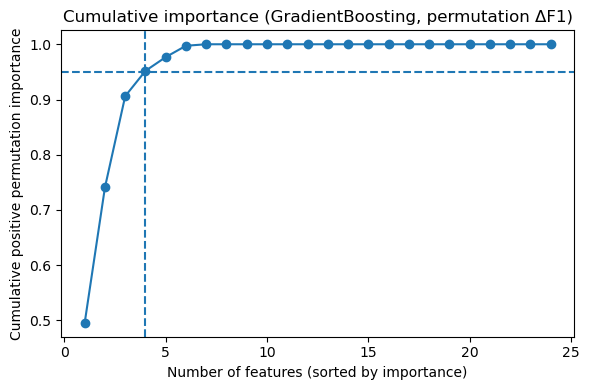

95% cumulative importance reached at k = 4
Top features up to threshold:
- total_clipped_bases
- kmer_js_divergence
- kmer_cosine_diff
- softclip_left


In [112]:
# GRADIENT BOOSTING VERSION (PAIR-safe) — Cumulative importance curve
# Assumes you already have gb_imp DataFrame with:
#   feature, importance_mean, importance_std
# and you want cumulative over POSITIVE importances only.

import numpy as np
import matplotlib.pyplot as plt

# ---- guard: ensure gb_imp exists
if "gb_imp" not in globals():
    raise NameError("gb_imp is not defined. Run the permutation importance cell for GradientBoosting first.")

gb_plot = gb_imp.copy()

# treat negative importance as 0
gb_plot["importance_pos"] = gb_plot["importance_mean"].clip(lower=0)

total_pos = float(gb_plot["importance_pos"].sum())
if total_pos == 0:
    raise ValueError("Total positive importance is 0. Nothing to plot (all importances <= 0).")

# sort + cumulative fraction
gb_plot = gb_plot.sort_values("importance_pos", ascending=False).reset_index(drop=True)
gb_plot["importance_frac"] = gb_plot["importance_pos"] / total_pos
gb_plot["cum_frac"] = gb_plot["importance_frac"].cumsum()

# curve
n_features = len(gb_plot)
x = np.arange(1, n_features + 1)
cum_importance = gb_plot["cum_frac"].to_numpy()

threshold = 0.95
k_thresh = int(np.searchsorted(cum_importance, threshold, side="left") + 1)  # 1-based

plt.figure(figsize=(6, 4))
plt.plot(x, cum_importance, marker="o")
plt.axhline(threshold, linestyle="--")
plt.axvline(k_thresh, linestyle="--")

plt.xlabel("Number of features (sorted by importance)")
plt.ylabel("Cumulative positive permutation importance")
plt.title("Cumulative importance (GradientBoosting, permutation ΔF1)")
plt.tight_layout()
plt.show()

print(f"{threshold*100:.0f}% cumulative importance reached at k = {k_thresh}")

# optional: show the features included up to k_thresh
top_feats = gb_plot.loc[: k_thresh - 1, "feature"].tolist()
print("Top features up to threshold:")
for f in top_feats:
    print("-", f)

### (B) Tiny bar chart comparing CatBoost variants (this one is the most useful)

Purpose: show that full vs selected vs no-microhomology all have similar performance → feature selection doesn’t hurt much and microhomology is weak.


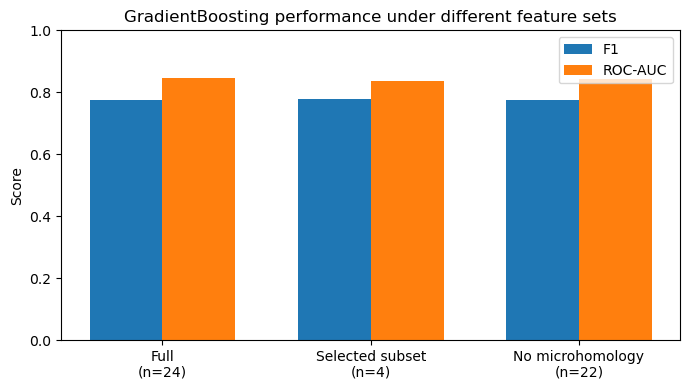

Full              n_features=24  F1=0.7765  ROC-AUC=0.8459
Selected subset   n_features= 4  F1=0.7768  ROC-AUC=0.8369
No microhomology  n_features=22  F1=0.7761  ROC-AUC=0.8444


In [114]:
# NEW VERSION — self-contained (no globals), no hardcoded metric values
# Requires: `results` already exists in your notebook

import numpy as np
import matplotlib.pyplot as plt

# change this label if you want
model_name = "GradientBoosting"

variants = [
    ("Full", "full"),
    ("Selected subset", "selected"),
    ("No microhomology", "no_microhomology"),
]

f1_scores  = [float(results[k]["f1"]) for _, k in variants]
auc_scores = [float(results[k]["roc_auc"]) for _, k in variants]
labels = [f"{name}\n(n={int(results[k]['n_features'])})" for name, k in variants]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7, 4))
plt.bar(x - width/2, f1_scores, width, label="F1")
plt.bar(x + width/2, auc_scores, width, label="ROC-AUC")

plt.xticks(x, labels)
plt.ylabel("Score")
plt.ylim(0.0, 1.0)
plt.title(f"{model_name} performance under different feature sets")
plt.legend()
plt.tight_layout()
plt.show()

for name, k in variants:
    print(
        f"{name:16s}  n_features={int(results[k]['n_features']):>2d}  "
        f"F1={float(results[k]['f1']):.4f}  ROC-AUC={float(results[k]['roc_auc']):.4f}"
    )

In [116]:
# NEW VERSION — self-contained writer (no globals checks)
# Assumes these already exist in your notebook:
#   - results: dict with keys {"full","selected","no_microhomology"}
#   - selected_features: list[str]
# Optional:
#   - perm_imp_df: DataFrame (permutation importance) if you want saved too

import pandas as pd
from pathlib import Path

# ---- configure output dir + prefix (edit if you want) ----
out_dir = Path("../reports/gradient_boosting_analysis_pair_noq")
out_dir.mkdir(parents=True, exist_ok=True)
perm_imp_df = gb_imp
prefix = "gradient_boosting"  # used in filenames

# ----------------------------
# 1) Feature-set metrics table (from results)
# ----------------------------
rows = []
for key in ["full", "selected", "no_microhomology"]:
    rows.append({
        "variant": key,
        "n_features": int(results[key]["n_features"]),
        "f1": float(results[key]["f1"]),
        "roc_auc": float(results[key]["roc_auc"]),
    })

df_fs = pd.DataFrame(rows)
metrics_path = out_dir / f"{prefix}_feature_selection_metrics_pair.tsv"
df_fs.to_csv(metrics_path, sep="\t", index=False)

# ----------------------------
# 2) Save selected feature list
# ----------------------------
sel_path = out_dir / f"{prefix}_selected_features_95pct_pair.txt"
with open(sel_path, "w") as f:
    for feat in selected_features:
        f.write(str(feat) + "\n")

# ----------------------------
# 3) Optional: save permutation importance table if you have it
#    (rename `perm_imp_df` to whatever your DF variable is)
# ----------------------------
if "perm_imp_df" in locals() and isinstance(perm_imp_df, pd.DataFrame):
    perm_path = out_dir / f"{prefix}_perm_importance_pair.tsv"
    perm_imp_df.to_csv(perm_path, sep="\t", index=False)
else:
    perm_path = None

print("Saved to:", out_dir.resolve())
print("Wrote metrics:", metrics_path.name)
print("Wrote selected features:", sel_path.name)
if perm_path is not None:
    print("Wrote perm importance:", perm_path.name)

Saved to: /Users/yvonnelin/Desktop/mitochime/reports/gradient_boosting_analysis_pair_noq
Wrote metrics: gradient_boosting_feature_selection_metrics_pair.tsv
Wrote selected features: gradient_boosting_selected_features_95pct_pair.txt
Wrote perm importance: gradient_boosting_perm_importance_pair.tsv
